In [159]:
using CSV
using DataFrames

PyPlot.matplotlib.style.use("seaborn-whitegrid")

In [2]:
df_income = DataFrame(CSV.read("incomes.csv"))

,city,per_capita_income
,String,Int64
1,Corvallis,19317
2,Berkeley,38896
3,San Franscisco,52261


In [3]:
sort!(df, :per_capita_income, rev=true)

UndefVarError: UndefVarError: df not defined

In [4]:
df_cities = DataFrame(city=["Corvallis", "Portland", "Eugene"], population=[57961, 647805, 168916])
push!(df_cities, ["Bend", 94520])
push!(df_cities, Dict(:population => 122324, :city => "Berkeley"))
df_cities[!, :state] = vcat(["OR" for i = 1:4], ["CA"])

5-element Array{String,1}:
 "OR"
 "OR"
 "OR"
 "OR"
 "CA"

## Joins

In [5]:
df_sm = join(df_cities, df_income, on=:city, kind=:inner)

,city,population,state,per_capita_income
,String,Int32,String,Int64
1,Corvallis,57961,OR,19317
2,Berkeley,122324,CA,38896


In [6]:
df_big = join(df_cities, df_income, on=:city, kind=:outer)

,city,population,state,per_capita_income
,String,Int32⍰,String⍰,Int64⍰
1,Corvallis,57961,OR,19317
2,Portland,647805,OR,missing
3,Eugene,168916,OR,missing
4,Bend,94520,OR,missing
5,Berkeley,122324,CA,38896
6,San Franscisco,missing,missing,52261


In [7]:
df_lj = join(df_cities, df_income, on=:city, kind=:left)

,city,population,state,per_capita_income
,String,Int32,String,Int64⍰
1,Corvallis,57961,OR,19317
2,Portland,647805,OR,missing
3,Eugene,168916,OR,missing
4,Bend,94520,OR,missing
5,Berkeley,122324,CA,38896


In [8]:
df_rj = join(df_cities, df_income, on=:city, kind=:right)

,city,population,state,per_capita_income
,String,Int32⍰,String⍰,Int64
1,Corvallis,57961,OR,19317
2,Berkeley,122324,CA,38896
3,San Franscisco,missing,missing,52261


## unique

In [9]:
unique(df_big[:, :state])

3-element Array{Union{Missing, String},1}:
 "OR"   
 "CA"   
 missing

## delete duplicate rows

In [10]:
push!(df_cities, df_cities[2, :])

,city,population,state
,String,Int32,String
1,Corvallis,57961,OR
2,Portland,647805,OR
3,Eugene,168916,OR
4,Bend,94520,OR
5,Berkeley,122324,CA
6,Portland,647805,OR


In [11]:
unique!(df_cities)

,city,population,state
,String,Int32,String
1,Corvallis,57961,OR
2,Portland,647805,OR
3,Eugene,168916,OR
4,Bend,94520,OR
5,Berkeley,122324,CA


# Week 2 stuff

In [12]:
mean(df_cities.population)

218305.2

In [13]:
steak = dropmissing!(DataFrame(CSV.read("steak.csv", header=[:eats_steak, :how_cooked], copycols=true)))
first(steak, 10)

,eats_steak,how_cooked
,String,String
1,Yes,Medium rare
2,Yes,Rare
3,Yes,Medium
4,Yes,Medium
5,Yes,Medium rare
6,Yes,Medium rare
7,Yes,Medium
8,Yes,Medium rare
9,Yes,Medium rare


In [14]:
steak_result = sort!(by(steak, :how_cooked, count=:how_cooked => length), :count, rev=true)

,how_cooked,count
,String,Int32
1,Medium rare,166
2,Medium,132
3,Medium Well,74
4,Well,35
5,Rare,23


In [15]:
using PyPlot, PyCall

In [16]:
steak_result

,how_cooked,count
,String,Int32
1,Medium rare,166
2,Medium,132
3,Medium Well,74
4,Well,35
5,Rare,23


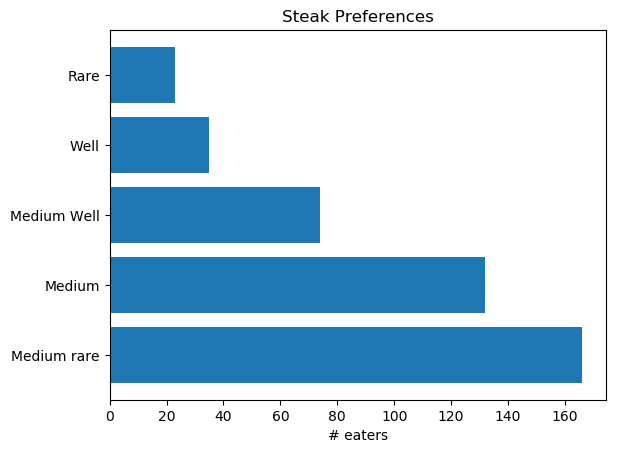

PyObject Text(0.5, 1.0, 'Steak Preferences')

In [17]:
figure()
barh(
    1:size(steak_result, 1),
    steak_result.count
)    
yticks(
    1:size(steak_result, 1),
    steak_result.how_cooked
)
xlabel("# eaters")
title("Steak Preferences")


In [18]:
# for _ in 1:1e6
#     print("fuck")
# end

In [19]:
[i for i in 1:size(steak_result, 1)]

5-element Array{Int32,1}:
 1
 2
 3
 4
 5

## salary hist

In [22]:
salaries = DataFrame(CSV.read("osu_salaries.csv"))
first(salaries, 6)

,department,job_title,salary,nb_months
,String,String,Float64,Int64
1,SMT - Mathematics,Coordinator MSLC,69840.0,12
2,ESE - Sch Elect Engr/Comp Sci,Assistant Professor,94014.0,9
3,LCB - Acad Prog / Student Aff,Assistant Professor,101304.0,9
4,MSA - Univ Exploratory Studies,Coord-Career Major Dec Making,53004.0,12
5,XEM - Enrollment Mgmt InfoTech,Operations Manager,63000.0,12
6,MSA - Counseling Center,Staff Counselor,62388.0,12


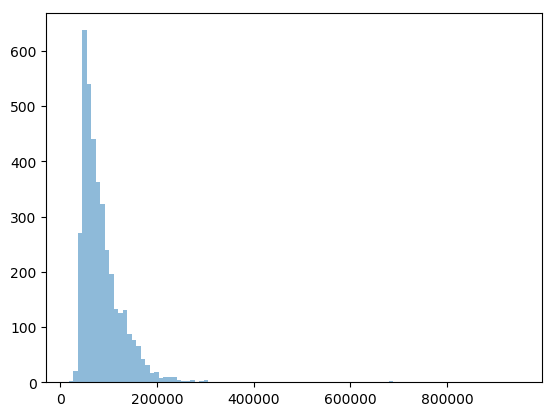

([2.0, 20.0, 270.0, 637.0, 539.0, 440.0, 362.0, 323.0, 240.0, 196.0  …  0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0], [17550.0, 26874.5, 36199.1, 45523.6, 54848.2, 64172.7, 73497.2, 82821.8, 92146.3, 1.01471e5  …  8.66083e5, 8.75408e5, 8.84732e5, 8.94057e5, 9.03381e5, 9.12706e5, 9.2203e5, 9.31355e5, 9.40679e5, 950004.0], PyObject[PyObject <matplotlib.patches.Rectangle object at 0xce1dbc2c>, PyObject <matplotlib.patches.Rectangle object at 0xce1dbacc>, PyObject <matplotlib.patches.Rectangle object at 0xce1dbf6c>, PyObject <matplotlib.patches.Rectangle object at 0xcdf9138c>, PyObject <matplotlib.patches.Rectangle object at 0xcdf9146c>, PyObject <matplotlib.patches.Rectangle object at 0xcdf9196c>, PyObject <matplotlib.patches.Rectangle object at 0xcdf91b0c>, PyObject <matplotlib.patches.Rectangle object at 0xcdf91d6c>, PyObject <matplotlib.patches.Rectangle object at 0xcdf915ec>, PyObject <matplotlib.patches.Rectangle object at 0xcdf916cc>  …  PyObject <matplotlib.patches.Rectangle o

In [24]:
PyPlot.hist(salaries.salary, bins=100, alpha=0.5)

In [33]:
# ;conda install seaborn -y
# using PyCall
sns = pyimport("seaborn")

PyCall.PyError: PyError (PyImport_ImportModule

The Python package seaborn could not be found by pyimport. Usually this means
that you did not install seaborn in the Python version being used by PyCall.

PyCall is currently configured to use the Julia-specific Python distribution
installed by the Conda.jl package.  To install the seaborn module, you can
use `pyimport_conda("seaborn", PKG)`, where PKG is the Anaconda
package the contains the module seaborn, or alternatively you can use the
Conda package directly (via `using Conda` followed by `Conda.add` etcetera).

Alternatively, if you want to use a different Python distribution on your
system, such as a system-wide Python (as opposed to the Julia-specific Python),
you can re-configure PyCall with that Python.   As explained in the PyCall
documentation, set ENV["PYTHON"] to the path/name of the python executable
you want to use, run Pkg.build("PyCall"), and re-launch Julia.

) <class 'ModuleNotFoundError'>
ModuleNotFoundError("No module named 'seaborn'")


In [40]:
viable_job_titles = [
    "Assistant Professor",
    "Associate Professor", 
    "Professor"
]

salaries[viable_job_titles[1] .in salaries[:job_title]]

LoadError: syntax: space before "." not allowed in "viable_job_titles[1] ."

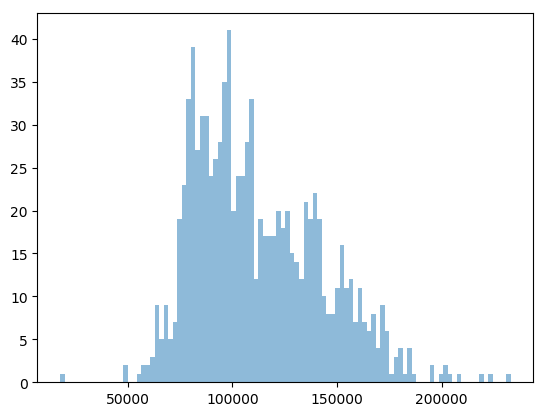

In [68]:
filter!(row -> row[:job_title] in viable_job_titles, salaries)
PyPlot.hist(salaries.salary, bins=100, alpha=0.5);

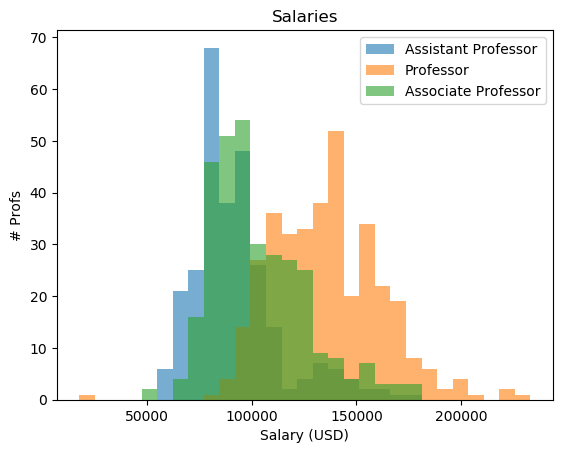

In [67]:
bins = range(minimum(salaries[:, :salary]), stop=maximum(salaries[:, :salary]), length=30)

for g in groupby(salaries, :job_title)
    PyPlot.hist(g.salary, bins=bins, alpha=0.6, label=g.job_title[1])
    PyPlot.legend()
    PyPlot.xlabel("Salary (USD)")
    PyPlot.ylabel("# Profs")
    PyPlot.title("Salaries")
end

# Line Plots

In [83]:
gas = ["Xe", "Kr"]
pressure_key = Symbol("pressure (torr)")
gas_ads_key = Symbol("gas uptake (mmol/g)")
ads_data = Dict{String, DataFrame}()
for g in gas
    ads_data[g] = DataFrame(CSV.read("$g.csv"))
end

first(ads_data["Kr"], 5)

,pressure (torr),gas uptake (mmol/g)
,Float64,Float64
1,24.2376,0.0300429
2,39.9295,0.0498731
3,55.2449,0.0685841
4,77.8983,0.0953794
5,114.79,0.136813


MethodError: MethodError: no method matching keys(::DataFrame)
Closest candidates are:
  keys(!Matched::Core.SimpleVector) at essentials.jl:591
  keys(!Matched::Cmd) at process.jl:847
  keys(!Matched::DataFrames.Index) at /home/mick/.julia/packages/DataFrames/yH0f6/src/other/index.jl:83
  ...

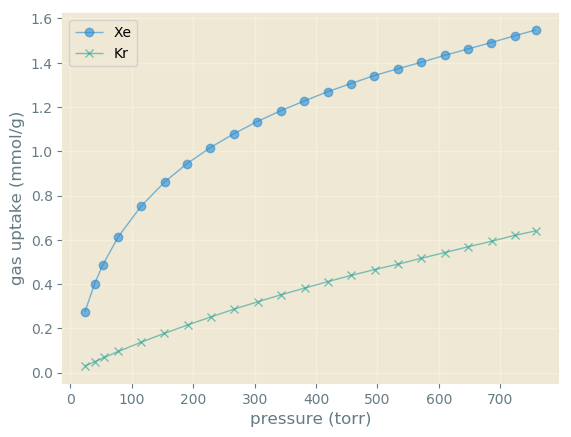

In [99]:
gas_marker_dict = Dict("Xe" => "o", "Kr" => "x")
figure()
for gas in gas
    marker = gas_marker_dict[gas]
    PyPlot.plot(
        ads_data[gas][:, pressure_key], 
        ads_data[gas][:, gas_ads_key],
        "$marker-",
        lw=1,
        alpha=0.6,
        label=gas
    )
    PyPlot.grid("on", alpha=0.5)
    PyPlot.legend()
    PyPlot.xlabel(pressure_key)
    PyPlot.ylabel(gas_ads_key)
end

# Scatter Plots

In [136]:
year = Symbol("2010")
df_income = DataFrame(CSV.read("GDP_per_capita.csv"), copycols=true)[:, [:country, year]]
dropmissing!(df_income, year)
rename!(df_income, year => :income)
first(df_income, 6)

,country,income
,String,Float64
1,Germany,25420.3
2,Spain,15418.8
3,Bosnia and Herzegovina,2183.26
4,"Congo, Rep.",1253.8
5,Malta,11062.2
6,Mexico,6124.71


In [135]:
df_life = DataFrame(CSV.read("life_expectancy.csv"), copycols=true)[:,  [:country, year]]
dropmissing!(df_life, year)
rename!(df_life, year => :life_expectancy)
first(df_life, 6)

,country,life_expectancy
,String,Float64
1,Syria,76.5
2,"Congo, Dem. Rep.",58.4
3,Chad,55.8
4,Turkmenistan,68.1
5,Mali,59.2
6,Grenada,71.0


In [138]:
df_plot = join(df_life, df_income, on=:country, kind=:inner)
first(df_plot, 6)

,country,life_expectancy,income
,String,Float64,Float64
1,Syria,76.5,1525.81
2,"Congo, Dem. Rep.",58.4,105.532
3,Chad,55.8,300.106
4,Turkmenistan,68.1,1209.79
5,Mali,59.2,273.254
6,Grenada,71.0,6011.85


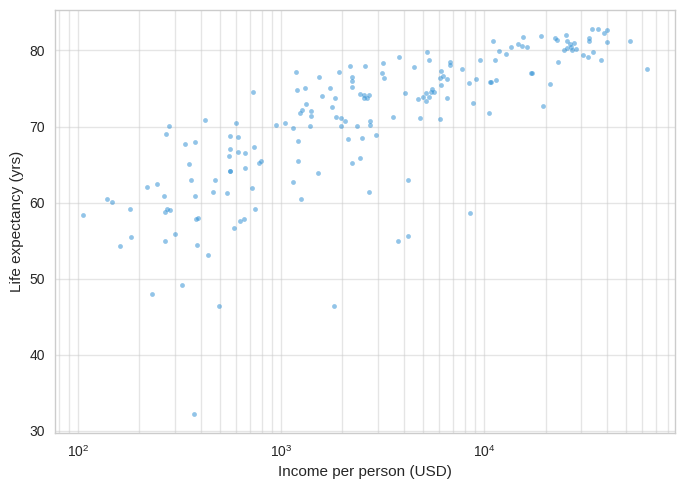

In [162]:
figure()
xlabel("Income per person (USD)")
ylabel("Life expectancy (yrs)")
scatter(
    df_plot.income,
    df_plot.life_expectancy,
    alpha=0.5,
    s=12,
    lw=0
)
grid("on", alpha=0.5, which="both")
xscale("log")

In [ ]:
ax.set_x